In [1]:
%load_ext autoreload
%autoreload 2

%run ../setup_project.py
%run ../neuronAutopi.py

prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:715: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()
/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:743: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()
/home/pascal/repo/Jazi_et.al_2023_noInt/setup_project.py:767: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplie

data path: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter
Project name: autopi_ca1
dataPath: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1
Reading /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:14<00:00,  2.67it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


To get our ses.trialList

In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)

Loading: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 8.1 s, sys: 3.81 s, total: 11.9 s
Wall time: 15 s


In [3]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getAccurateHomingIntervals(ses)

39it [00:09,  4.10it/s]


In [4]:
myProject.dataPath

'/home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_ca1'

In [5]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getShortSearchIntervals(ses)

39it [00:08,  4.64it/s]


In [6]:
fn=myProject.dataPath+"/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
    
fn=myProject.dataPath+"/results/myLeverMapsAccurate.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMaps = pickle.load(handle)
        
fn=myProject.dataPath+"/results/myLeverMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMapsLD = pickle.load(handle)
        
fn=myProject.dataPath+"/results/myLeverMapsStatsAccurate.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsStats = pickle.load(handle)
    
    
fn=myProject.dataPath+"/results/myLeverMapsShortSearch.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsShortSearch = pickle.load(handle)

fn=myProject.dataPath+"/results/aroundLeverIFRDict.pickle"
with open(fn, 'rb') as handle:
    trialMat = pickle.load(handle)
 

In [7]:
fn=myProject.dataPath+"/results/leverCells.pickle"
with open(fn, 'rb') as handle:
    leverCells = pickle.load(handle)

## Filter for pyramidal cells

In [8]:
fn=myProject.dataPath+"/results/cell_classification_noint.csv"
ct = pd.read_csv(fn)
ct

,Unnamed: 0,id,session,subject,valid,cellType,meanRate,shank,layer
0,0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...,...
1075,1263,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1076,1264,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1077,1265,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1078,1266,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [9]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [10]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 438


In [11]:
for k in myMaps.keys():
    myMaps[k] = myMaps[k][pyrIndices]

In [12]:
for d in [myLeverMaps,myLeverMapsStats, myLeverMapsLD,myLeverMapsShortSearch]:
    for k in d.keys():
        for kk in d[k].keys():
            for kkk in d[k][kk].keys():
                d[k][kk][kkk] = d[k][kk][kkk][pyrIndices]

In [13]:
newMat = {}
for k in trialMat:
    if k in pyrId.values:
        newMat[k]=trialMat[k]
len(newMat.keys())
trialMat = newMat

In [14]:
pyrId = pyrId.reset_index(drop=True)

## Lever cells

We have a list of lever cells identified in `lever_centered_maps_figure.ipynb`

In [15]:
leverCells=leverCells["all_dark"]["none"]

In [16]:
leverCells

,id,cellIndex,subject
0,mn5824-20112020-0107_92,0,mn5824
29,mn5824-02122020-0106_168,29,mn5824
30,mn711-31012021-0107_44,30,mn711
32,mn711-31012021-0107_47,32,mn711
33,mn711-31012021-0107_48,33,mn711
...,...,...,...
421,mn9686-01112021-0106_45,421,mn9686
422,mn9686-01112021-0106_46,422,mn9686
432,mn9686-01112021-0106_76,432,mn9686
435,mn9686-01112021-0106_197,435,mn9686


In [17]:

leverCells['session']= [i.split('_')[0] for i in leverCells['id']]
leverCells.groupby(['session']).describe()

cellIndex                                               \
                          count        mean        std    min     25%    50%   
session                                                                        
TYY5622-17092021-0106       1.0  263.000000        NaN  263.0  263.00  263.0   
TYY5622-19092021-0106       2.0  269.000000   2.828427  267.0  268.00  269.0   
TYY5622-20092021-0106       1.0  277.000000        NaN  277.0  277.00  277.0   
mn1173-02052021-0107        1.0  147.000000        NaN  147.0  147.00  147.0   
mn1173-06052021-0107        9.0  169.777778  13.479408  152.0  163.00  167.0   
mn1173-08052021-0107        3.0  203.333333  10.066446  194.0  198.00  202.0   
mn1173-11052021-0108        1.0  234.000000        NaN  234.0  234.00  234.0   
mn2739-15022021-0105        2.0   88.000000   1.414214   87.0   87.50   88.0   
mn2739-16022021-0106        5.0   95.000000   2.738613   92.0   93.00   95.0   
mn2739-17022021-0106        6.0  103.833333   3.188521  100.0  101.50  103.5   
mn3246-09042021-0106        6.0  112.833333   3.311596  109.0  110.25  112.5   
mn3246-10042021-0106        8.0  126.625000   3.020761  122.0  124.75  126.5   
mn3246-12042021-0106        1.0  139.000000        NaN  139.0  139.00  139.0   
mn5618-12072021-0110        7.0  248.000000   6.480741  240.0  243.50  246.0   
mn5824-02122020-0106        1.0   29.000000        NaN   29.0   29.00   29.0   
mn5824-20112020-0107        1.0    0.000000        NaN    0.0    0.00    0.0   
mn711-01022021-0107         1.0   42.000000        NaN   42.0   42.00   42.0   
mn711-02022021-0108         5.0   56.400000   2.408319   53.0   55.00   57.0   
mn711-03022021-0107         3.0   69.000000   2.000000   67.0   68.00   69.0   
mn711-04022021-0107         2.0   78.500000   4.949747   75.0   76.75   78.5   
mn711-31012021-0107         6.0   33.666667   2.581989   30.0   32.25   33.5   
mn9686-01112021-0106       12.0  418.166667  11.830879  402.0  411.50  417.0   
mn9686-26102021-0106        2.0  284.500000   0.707107  284.0  284.25  284.5   
mn9686-27102021-0106        7.0  300.857143   8.194075  292.0  296.00  298.0   
mn9686-28102021-0107        9.0  332.111111  10.658851  316.0  325.00  333.0   
mn9686-29102021-0106        7.0  370.857143  14.040757  356.0  362.50  365.0   

                                      
                          75%    max  
session                               
TYY5622-17092021-0106  263.00  263.0  
TYY5622-19092021-0106  270.00  271.0  
TYY5622-20092021-0106  277.00  277.0  
mn1173-02052021-0107   147.00  147.0  
mn1173-06052021-0107   179.00  189.0  
mn1173-08052021-0107   208.00  214.0  
mn1173-11052021-0108   234.00  234.0  
mn2739-15022021-0105    88.50   89.0  
mn2739-16022021-0106    96.00   99.0  
mn2739-17022021-0106   106.25  108.0  
mn3246-09042021-0106   115.50  117.0  
mn3246-10042021-0106   128.50  131.0  
mn3246-12042021-0106   139.00  139.0  
mn5618-12072021-0110   253.00  257.0  
mn5824-02122020-0106    29.00   29.0  
mn5824-20112020-0107     0.00    0.0  
mn711-01022021-0107     42.00   42.0  
mn711-02022021-0108     58.00   59.0  
mn711-03022021-0107     70.00   71.0  
mn711-04022021-0107     80.25   82.0  
mn711-31012021-0107     35.50   37.0  
mn9686-01112021-0106   424.50  436.0  
mn9686-26102021-0106   284.75  285.0  
mn9686-27102021-0106   304.50  315.0  
mn9686-28102021-0107   335.00  352.0  
mn9686-29102021-0106   377.50  395.0

In [18]:
leverCells.shape

(109, 4)

In [19]:
leverCells['subject']= [i.split('-')[0] for i in leverCells['id']]
leverCells.groupby(['subject']).describe()

cellIndex                                                            
            count        mean        std    min     25%    50%     75%    max
subject                                                                      
TYY5622       4.0  269.500000   5.972158  263.0  266.00  269.0  272.50  277.0
mn1173       14.0  179.928571  25.168553  147.0  163.75  175.0  192.75  234.0
mn2739       13.0   98.000000   6.658328   87.0   93.00   99.0  103.00  108.0
mn3246       15.0  121.933333   8.795020  109.0  115.00  124.0  127.50  139.0
mn5618        7.0  248.000000   6.480741  240.0  243.50  246.0  253.00  257.0
mn5824        2.0   14.500000  20.506097    0.0    7.25   14.5   21.75   29.0
mn711        17.0   52.352941  16.903924   30.0   36.00   55.0   67.00   82.0
mn9686       37.0  358.864865  49.525057  284.0  316.00  356.0  404.00  436.0

In [20]:
def loadNavPathSummary(ses):
    fn = ses.path+"/navPathSummary.csv"
    navPathSummary = pd.read_csv(fn)
    return navPathSummary

def alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                            filling= True, smoothing=True,smoothingSigma=0.5,
                            behavioralVariable= "searchDuration",verbose=False):
    """
    Function to get a trial matrix and a data frame with trial variables
    
    Arguments:
    cellId
    pathName: we use the path call all (includes search, time at lever and homing)
    light: light condition (light or dark)
    poorOccupancyRemove: whether to remove trials with poor occupancy around the lever
    silentTrialRemove: whether we should remove trials in which the cell was silent
    filling: whether to filled unvisited firing rate to the median of the trial matrix
    smoothing: whether to smooth the firing rate of each trial
        
    """
    
    # we will fill and smooth after filtered out problematic trials
    mat = getTrialMatrix(cellId,pathName="all",filling=False,smoothing=False, smoothingSigma = smoothingSigma)
    if verbose:
        print("mat shape:", mat["matrix"].shape)
    
    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)

    df = ses.getTrialVariablesDataFrame()
    
    
    df = df[(df.light==light) & (df.nLeverPresses >=1) & (~np.isnan(df[behavioralVariable]))]
    if verbose:
        print("ses.getTrialVariablesDataFrame", df.shape)
    
    # get the all dark paths that were included in the matrices    
    navs = loadNavPathSummary(ses)
    navs = navs[(navs.type==pathName)&(navs.light==light)&(navs.nLeverPresses>=1)]
    if verbose:
        print("navs:",navs.shape)

    # get the name of the paths that we want to consider, the last of each trial 
    nPN = ["{}-{}_all".format(n,j-1)  for n,j in   zip(df.name,df.nJourneys)]

    # the assumption here is that the order of the navs.name correspond to the order of the trials in trialMat
    # restrict the matrix to trials that are in ses.getTrialVariablesDataFrame
    indices = [n in nPN for n in navs.name]
    if verbose:
        print("length indices:", len(indices))
        print("sum indices:", np.sum(indices))
    
    # keep only trials in the matrix for which we have valid behavioral data.
    m = {} # m is a dictionary, not a matrix, but it contains the matrix
    m["matrix"] = mat["matrix"][indices,:] # get the indices 
    m["bins"] = mat["bins"]
    
    
    if m["matrix"].shape[0] != df.shape[0]:
        print(mat["matrix"].shape, df.shape)
    
    
    if poorOccupancyRemove: # only keep trials for which we have 2/3 of all directions covered
        occupancyProbThreshold=2/3
        toKeep = np.sum(~np.isnan(m["matrix"]),axis=1)/m["matrix"].shape[1] > occupancyProbThreshold
        m["matrix"] = m["matrix"][toKeep] # filter matrix
        df = df[toKeep] # filter df
        
    
    if silentTrialRemove: # remove trials in which the cell was not firing
        peakRateThreshold = 1.0
        toKeep = np.nanmax(m["matrix"],axis=1) > peakRateThreshold
        m["matrix"] = m["matrix"][toKeep] # filter matrix
        df = df[toKeep] # filter df
        
    if filling:
        # fill the invalid values to be able to smooth, this add the median of each column to missing values
        myMedian = np.nanmedian(m["matrix"])
        m["matrix"][np.isnan(m["matrix"])] = myMedian
        
    if smoothing:
        # smooth the m matrix
        m["matrix"] =  gaussian_filter1d(m["matrix"], sigma=smoothingSigma, axis = 1)
    
    if verbose:
        print("filtered matrix shape:",m["matrix"].shape)
    return m, df

def matrixMeanRate(mat):
    """
    Get the mean rate for different degrees
    """
    return np.nanmean(mat["matrix"],axis=0)

def matrixBinCenter(mat):
    """
    Returns the center of each bin in the matrix
    """
    return mat["bins"][:-1] + np.diff(mat["bins"])/2
def matrixCircularMean(mat):
    """
    Return the circular mean of a matrix, assumings the x axis (bins) is in radians
    """

    y = matrixMeanRate(mat)
    x = matrixBinCenter(mat)
    return histogramCircularStats(y,x)[0]

def occupancyPerTrial(mat):
    """
    Return the occupancy per trial. This is the proporition of bins that are np.nan for a trial
    
    You need to run this on the version of the matrix in which the np.nan have not been filled with non np.nan values
    """
    return np.sum(np.isnan(mat["matrix"]),axis=1)/mat["matrix"].shape[0]

def plotTrialIFRMatrixMean(ax,m,showXLabel=True,color="blue",setPeak=None):
    """
    Plot the mean of a matrix
    """
    
    
    if setPeak is None:
        ax.plot(matrixBinCenter(m),matrixMeanRate(m),color=color)
    else:
        mr=matrixMeanRate(m)
        ax.plot(matrixBinCenter(m),mr/np.max(mr)*setPeak,color=color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])


def plotTrialIFRMatrixMeanPolar(gs,m,showXLabel=True):
    """
    Plot the mean of a matrix as a polar plot
    """
    
    ax = fig.add_subplot(gs[0], projection='polar')
    ax.plot(np.append(matrixBinCenter(m),matrixBinCenter(m)[0]),np.append(matrixMeanRate(m),matrixMeanRate(m)[0]))
    #ax.spines['left'].set_linewidth(1.5)
    #ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    #ax.set_xticks(ticks=[0, np.pi])
    #ax.set_xticklabels(["0", "$\pi$"])
    
def crossCorrelationTrialMatrixWithMean(mat):
    """
    This can be used to see if the rate from a single trial is rotated relative to the trial-aligned mean
    
    Use a matrix without np.nana for better results
    
    """
    #matMean = matrixMeanRate(mat)
    matMean = trialAlignedMatrixMeanRate(mat)
    
    def myfunct(myRow):
        return np.correlate(myRow,matMean,mode="same")
    return {"matrix": np.apply_along_axis(myfunct, 1, mat["matrix"]), "bins" : mat["bins"] }

def histogramCircularStats(y,x):
    """
    Calculate the circular mean and peak of a circular histogram
    
    Arguments:
    x = x value associated with each bin, in radian
    y = y value of each bin
    """
    
    xComp = np.nansum(np.cos(x)*y)
    yComp = np.nansum(np.sin(x)*y)
    
    # get the angle of these sums
    return np.arctan2(yComp,xComp), x[np.argmax(y)]
    
def centerTrialMatrixPeak(mat):
    """
    Roll the trial matrix so that the mean peak firing rate is in the center of the matrix.
    This does not align individual trials
    
    It returns a new matrix
    """
    meanTuningCurve = matrixMeanRate(mat)
    peakLoc = np.argmax(meanTuningCurve)
    midPoint = int(mat["matrix"].shape[1]/2)
    shift = -(peakLoc - midPoint)
    return {"matrix": np.roll(mat["matrix"].copy(),shift,axis = 1),"bins": mat["bins"]}


def getXCorTrialShift(mat):
    """
    Calculate the shift from the mean firing rate tuning curve for each trial
    
    Use a filled matrix
    """
    centeredMat = centerTrialMatrixPeak(mat)
    crossMat = crossCorrelationTrialMatrixWithMean(centeredMat)
    bins = matrixBinCenter(centeredMat)
    shift = np.argmax(crossMat["matrix"],axis=1)
    return bins[shift]

def trialAlignedTrialMatrix(mat):
    """
    This aligned individual trials so that the peak rate of each trial is at the center of the matrix
    
    Use a matrix without np.nana for better results
    
    """
    m = mat["matrix"]
    
    def peakAlignedTrial(myRow):
        peakLoc=np.argmax(myRow)
        halfSize=int(myRow.shape[0]/2)
        return np.roll(myRow,halfSize-peakLoc)
    return {"matrix": np.apply_along_axis(peakAlignedTrial, 1, mat["matrix"]), "bins" : mat["bins"] }

def trialAlignedMatrixMeanRate(matFilled):
    """
    Return the idealized tuning curve of the neuron after removing any between trial variability in the direction of the peak rate
    
    """
    centeredMat = centerTrialMatrixPeak(matFilled)
    alignedMat = trialAlignedTrialMatrix(centeredMat)
    return matrixMeanRate(alignedMat)

In [21]:
from sklearn.impute import SimpleImputer
from scipy.ndimage import gaussian_filter1d

def getTrialMatrix(cellId, pathName="all", filling=True, smoothing=True,smoothingSigma=0.5):
    """
    Get the matrix of a particular cell from our dictionary data store
    """
    mat = trialMat[cellId]["matrix"]['{}_dark_targetToAnimalAngle'.format(pathName)]
    
    m = {}
    m["matrix"] = mat["matrix"].copy()
    m["bins"] = mat["bins"].copy()
    
    if filling:
        # fill the invalid values to be able to smooth, this add the median of each column to missing values
        myMedian = np.nanmedian(m["matrix"])
        m["matrix"][np.isnan(m["matrix"])] = myMedian
        
    if smoothing:
        # smooth the m matrix
        m["matrix"] =  gaussian_filter1d(m["matrix"], sigma=smoothingSigma, axis = 1)
    return m

def plotTrialIFRMatrix(ax,m,showXLabel=True,sort=False, showYLabel=True,colorBar=False,aspect="auto"):
    """
    Plot the matrix of rate per journey as a function ?
    """
    
    # sort matrix from shortest to longest distance from lever
    if sort:
        m["matrix"]= m["matrix"][np.argsort(-np.sum(np.isnan(m["matrix"]),axis=1))]
    
    pos = ax.imshow(m['matrix'],aspect=aspect,interpolation="none",extent=[np.min(m["bins"]),np.max(m["bins"]),0,m["matrix"].shape[0]],origin="lower",cmap="jet")
    if colorBar:
        fig.colorbar(pos, ax=ax)
    
    if showYLabel:
        ax.set_ylabel("Paths", fontsize=12)
    if showXLabel:
        ax.set_xlabel("Direction", fontsize=12)
        ax.xaxis.set_label_coords(0.5,-0.175)
    else:
        ax.set_xlabel("")
    #ax.yaxis.set_label_coords(-0.4, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    

## Amount of trial shift vs search path length

We now have the function needed to calculate the trial shift for each trial and we have access to the search path length.

We can test if these variables are positively correlated, considering our 108 lever cells.

In [22]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

def searchPropertiesTrialDriftCor(cellId,light="dark",behavioralVariable="searchDuration",filling= True, smoothing=True,
                                  verbose=False, log=False):
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    searchVar = df[behavioralVariable]
    if log:
        searchVar = np.log(searchVar+1)
    r,p = pearsonr(searchVar,np.abs(trialShifts))
    return r

def searchPropertiesTrialDriftData(cellId,light="dark",behavioralVariable="searchDuration",filling= True, smoothing=True,
                                   verbose=False, log=False):
    
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    searchVar = df[behavioralVariable]
    if log:
        searchVar = np.log(searchVar+1)
    return pd.DataFrame({behavioralVariable:searchVar, "trialShift" : np.abs(trialShifts)}) 

def formatPValue(p,withE=True):
    """
    Format the p value to print on a plot
    It will format use latex to format P = 1.2 x 10-20 with -20 as supercript and P in italic.
    You can pass the returned value to ax.text().
    
    Argument:
    p: p-value
    withE: boolean, indicate whether to print in the 1.23e-10 format
    
    Example
    ax.text(1,1, formatPValue(p))
    
    
    """
    if p > 0.001:
        pString = "$P$ = {:.2}".format(p)
    else:
        if withE:
            pString = "$P$ = {:.2e}".format(p)
        else:
            sciNoti = "{:.1e}".format(p)
            base = sciNoti.split("e")[0]
            expo = sciNoti.split("e")[1]
            pString = "$P$ = {} x $10^{{{}}}$".format(base,expo)
    return pString

In [23]:
%%time
##for var in ['searchLength', 'searchMedianMVDeviationToTarget']:
for var in ['searchLength']:
    df= [ searchPropertiesTrialDriftData(cellId=cluId,light="dark",behavioralVariable=var,filling=True,smoothing=True,log=False) for cluId in leverCells.id ]



CPU times: user 17.3 s, sys: 161 ms, total: 17.4 s
Wall time: 17.4 s


In [24]:
len(df)
dfCell=[]
for i,d in enumerate(df):
    #print(i,d)
    s= pd.Series(leverCells.id.iloc[i].split('-')[0]).repeat(d.shape[0])
    ses= pd.Series(leverCells.id.iloc[i].split('_')[0]).repeat(d.shape[0])
    s= pd.DataFrame({'subject':s, 'session': ses})
    dfc= pd.concat([d, s], axis=1)
    dfCell.append(dfc)
#pd.DataFrame({'Subject':s})
dfCells= pd.concat(dfCell)

dfCells

,searchLength,trialShift,subject,session
0,38.950020,0.661388,mn5824,mn5824-20112020-0107
0,26.043905,0.661388,mn5824,mn5824-20112020-0107
0,74.147421,0.992082,mn5824,mn5824-20112020-0107
0,60.076901,0.992082,mn5824,mn5824-20112020-0107
0,117.886800,0.000000,mn5824,mn5824-20112020-0107
...,...,...,...,...
0,28.516421,0.000000,mn9686,mn9686-01112021-0106
0,37.304925,0.330694,mn9686,mn9686-01112021-0106
0,222.731884,0.330694,mn9686,mn9686-01112021-0106
0,15.156825,0.661388,mn9686,mn9686-01112021-0106


In [25]:
def plot_corr_rawdata(ax0,ax1):

    Sleng=[]
    Tshift=[]

    for i,ses in enumerate(dfCells.session.unique()):

        ind= np.where(dfCells['session']==ses)
        SearchLeng = dfCells['searchLength'].iloc[ind].reset_index(drop=True)
        TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)
        Sleng.append(SearchLeng)
        Tshift.append(TrialShift)

        MouseCorr=[]
    for i,n in enumerate(Sleng):
        #print(i,n)
        r,p = pearsonr(n,Tshift[i])
        MouseCorr.append(r)

    dfMouseCorr= pd.DataFrame(MouseCorr)
    dfMouseCorr.columns=['Corr.']

    dfMouseCorr['session']= list(dfCells.session.unique())
    dfMouseCorr['subject']= [dfMouseCorr['session'].iloc[r].split('-')[0] for r in range(dfMouseCorr.shape[0])]

    dfMouseCorr
    sesscorr=[]
    for i,m in enumerate(dfMouseCorr.subject.unique()):

        ind= np.where(dfMouseCorr['subject']==m)
        corr = dfMouseCorr['Corr.'].iloc[ind].reset_index(drop=True)
        sesscorr.append(corr)

  
    sns.boxplot(sesscorr, palette='Blues', ax= ax0)
    xlab=list(dfMouseCorr.subject.unique())
    ax0.set_xticklabels(xlab, rotation = 45, fontsize= 10)
    ax0.set_xlabel('Mice')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_linewidth(1.5)
    ax0.spines['bottom'].set_linewidth(1.5)
    ax0.set_title('Raw data')
    ax0.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.set_ylabel('Corr. of search path \n and trial drift (r)', fontsize= 10)
    ax0.set_ylim(-0.3,0.4)

    ######################
    ######################
    #########################
    ### Plot the corr for each mouse
    ######################
    ######################

    MouseCorr=[]
    for i,m in enumerate(dfCells.subject.unique()):
       # print(i,m)

        ind= np.where(dfCells['subject']==m)
        SearchLeng = dfCells['searchLength'].iloc[ind].reset_index(drop=True)
        TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)

        ######################
        ### calculate the corr
        ######################
        r,p = pearsonr(SearchLeng,TrialShift)
        MouseCorr.append(r)

    sns.boxplot(MouseCorr, color='lightblue', linewidth=1.5, ax= ax1)
    sns.stripplot(MouseCorr, size=9, ax= ax1)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax1.set_ylim(-0.2,0.2)

    ax1.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.set_xlabel('Mice', fontsize=10)
    ax1.set_xticks([])

    ax1.set_ylabel('Corr. of search path \n and trial drift (r)', fontsize= 10)
    ax1.text(-1.5, 1.2, 'b',fontsize=12 )
    ax1.text(-1.5, 0.35,'c',fontsize=12 )
   


In [26]:
def plot_searchLengthDistribution(ax,m):
    Sleng=[]
    Tshif=[]

    ind= np.where(dfCells['subject']==m)
    SearchLeng = dfCells['searchLength'].iloc[ind].reset_index(drop=True)
    TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)
    Sleng.append(SearchLeng)
    Tshif.append(TrialShift)          
    #ax= plt.subplot(gs[i])
    y, x, _ = ax.hist(SearchLeng)
    ax.set_xticks(np.arange(0,SearchLeng.max(), step=250))

    ax.axvline(x=SearchLeng.mean(), ymin=0, ymax=1, ls='--', c= 'black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax.set_xlabel('search length \n (cm)', fontsize=10)
    ax.set_ylabel('Trials', fontsize= 10)
    ax.set_title(m)
    ax.set_xlim(0,300)
    ax.text(150,y.max(), '{} cm'.format(round(SearchLeng.mean())))
    

## do the same but with the corr func for the raw data 

In [27]:
%%time
Corr = {}
for var in ['searchLength', 'searchMedianMVDeviationToTarget']:
    Corr[var] = [ searchPropertiesTrialDriftCor(cellId=cluId,light="dark",behavioralVariable=var,filling=True,smoothing=True,log=False) for cluId in leverCells.id ]

CPU times: user 35.6 s, sys: 1.19 s, total: 36.8 s
Wall time: 36.9 s


In [28]:
dfcorr=pd.DataFrame({'CorrLengthShift':Corr['searchLength']})

dfRaw= pd.concat([dfcorr,leverCells.reset_index()],axis=1)
dfRaw

,CorrLengthShift,index,id,cellIndex,subject,session
0,0.259038,0,mn5824-20112020-0107_92,0,mn5824,mn5824-20112020-0107
1,-0.185392,29,mn5824-02122020-0106_168,29,mn5824,mn5824-02122020-0106
2,-0.094795,30,mn711-31012021-0107_44,30,mn711,mn711-31012021-0107
3,0.121205,32,mn711-31012021-0107_47,32,mn711,mn711-31012021-0107
4,0.231454,33,mn711-31012021-0107_48,33,mn711,mn711-31012021-0107
...,...,...,...,...,...,...
104,0.014860,421,mn9686-01112021-0106_45,421,mn9686,mn9686-01112021-0106
105,0.184484,422,mn9686-01112021-0106_46,422,mn9686,mn9686-01112021-0106
106,0.005531,432,mn9686-01112021-0106_76,432,mn9686,mn9686-01112021-0106
107,-0.243466,435,mn9686-01112021-0106_197,435,mn9686,mn9686-01112021-0106


In [29]:
leverCells.subject
new = dfRaw[['CorrLengthShift','subject']].copy()
dfRawg= new.groupby(['subject']).mean().reset_index()
dfRawg

,subject,CorrLengthShift
0,TYY5622,0.189453
1,mn1173,0.038135
2,mn2739,0.122066
3,mn3246,0.044990
4,mn5618,0.046606
5,mn5824,0.036823
6,mn711,0.077494
7,mn9686,0.027809


In [30]:
from scipy.stats import wilcoxon,ttest_rel
wilcoxon(dfRawg.CorrLengthShift)

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

## Get the corr. between the variance of search length and trials shift/drift 

In [31]:
len(Corr['searchLength']), len(df)

(109, 109)

In [32]:
from scipy import stats

def plot_Var(ax2):
    ###########################
    ##########################
    # plot the corr between the variance of search length and trial drift
    ##########################
    ############################
    Var=[]
    for j in range(len(df)):
        
        Varapp= np.var(df[j]['searchLength'])
        Var.append(Varapp)
        #print(len(Var))
        
    x= Var;y= Corr['searchLength']
    print(len(x),len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    ax2.scatter(Var,Corr['searchLength'], s=2)
    ax2.plot(x, slope*np.array(x) + intercept, 'r')
    ax2.set_xlabel('Variance of \n search path length')
    ax2.set_ylabel('corr. of search path \n and trials drift')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    ax2.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax2.yaxis.set_tick_params(width=1.5, labelsize= 10)
    #ax2.text(0.5,0.6, formatPValue(r_value),ax.transAxes)
    ax2.text(0.4,0.750,'r = {:.2}'.format(r_value),transform=ax2.transAxes,fontsize=10)

In [33]:
def plot_Std(ax2):
    ###########################
    ##########################
    # plot the corr between the variance of search length and trial drift
    ##########################
    ############################
    Std=[]
    for j in range(len(df)):
        
        stdapp= np.std(df[j]['searchLength'])
        Std.append(stdapp)
        #print(len(Var))
        
    x= Std;y= Corr['searchLength']
    print(len(x),len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    ax2.scatter(Std,Corr['searchLength'], s=2)
    ax2.plot(x, slope*np.array(x) + intercept, 'r')
    ax2.set_xlabel('Std of \n search path length')
    ax2.set_ylabel('corr. of search path \n and trials drift')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    ax2.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax2.yaxis.set_tick_params(width=1.5, labelsize= 10)
    #ax2.text(0.5,0.6, formatPValue(r_value),ax.transAxes)
    ax2.text(0.4,0.750,'r = {:.2}'.format(r_value),transform=ax2.transAxes,fontsize=10)

In [34]:
def plot_RawData(ax0,ax1):

    MouseCorr=[]
    for i,m in enumerate(dfRaw.subject.unique()):
        #print(i,m)
        ind= np.where(dfRaw['subject']==m)
        corrm= dfRaw['CorrLengthShift'].iloc[ind]
        MouseCorr.append(corrm)

    sns.boxplot(data=[d for d in MouseCorr], palette='Blues', ax= ax0)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_linewidth(1.5)
    ax0.spines['bottom'].set_linewidth(1.5)
    ax0.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.yaxis.set_tick_params(width=1.5, labelsize= 10)
    xlab= np.arange(8)+1
    ax0.set_xticklabels(xlab, rotation = 0, fontsize= 10)
    ax0.set_ylabel('Corr. of path length \n and trial shift', fontsize= 10)
    ax0.set_title('Raw data',fontsize= 10)
    ax0.set_xlabel('Mice')
    #######################################
    ## plot the mean value for each mouse##
    #######################################
    
    sns.histplot(dfRawg.CorrLengthShift)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax1.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.yaxis.set_tick_params(width=1.5, labelsize= 10)
    #ax1.set_ylabel('Corr. of path length \n and trial shift', fontsize= 10)
    ax1.set_xlim(-0.3,0.3)

    

## Final figure

109 109


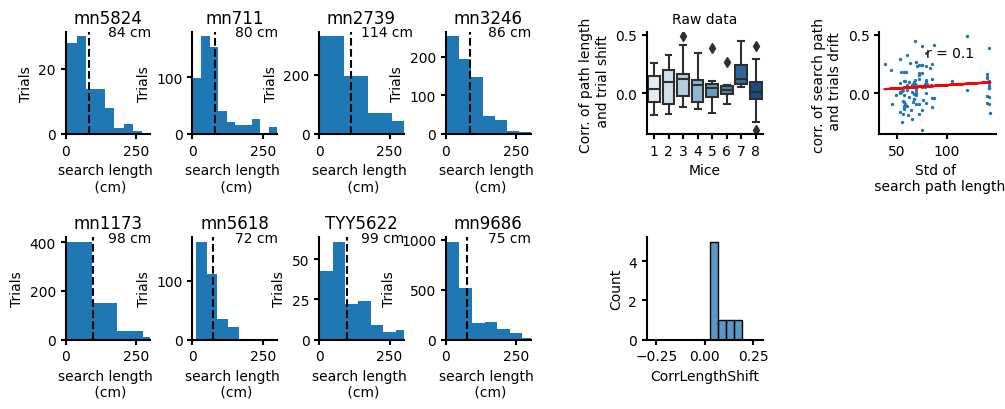

In [35]:
fig = plt.figure(figsize=(12,4))
sizePerRow, sizePerCol = 1.8, 1.2
nCells=5
col=4
row=2

#fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure

gs= gridspec.GridSpec(1, 3, figure=fig, width_ratios=[2,0.5,0.5], wspace=0.5)

gs_Searchlength = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=gs[0], wspace=0.5, hspace=1)

for i,m in enumerate(dfCells.subject.unique()):

    ax = fig.add_subplot(gs_Searchlength[i])
    plot_searchLengthDistribution(ax,m)
    
gs_rawdata= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], wspace=0.4, hspace=1)

ax0= fig.add_subplot(gs_rawdata[0])
ax1= fig.add_subplot(gs_rawdata[1])
plot_RawData(ax0,ax1)

#gs_variance= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.4, hspace=1)
gs_Std= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.4, hspace=1)
ax2=fig.add_subplot(gs_Std[0])
plot_Std(ax2)

#~fn = "/home/maryam/Desktop/Ca1_final/Sup12/sup12_revision_v2_part1.pdf"
fn = dataPath+"/results/Ca1_final__Sup12__sup12_revision_part1.pdf"
#print("saving",fn)
plt.savefig(fn, dpi=300)

## Calculate the same for homing accuracy 

# Homing accuracy 

We want to display the relationship between homing error and trial drift of lever-box-anchored fields.

In [36]:
from scipy.stats import wilcoxon,ttest_rel


In [37]:
def HomingPropertiesTrialDriftCor(cellId,light="dark",behavioralVariable="homingErrorAtPeripheryLeverAbsolute",filling= True, smoothing=True,
                                  verbose=False, log=False):
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    HomingError = df[behavioralVariable]
    if log:
        HomingError = np.log(HomingError+1)
    r,p = pearsonr(HomingError,np.abs(trialShifts))
    return r


In [38]:
def HomingPropertiesTrialDriftData(cellId,light="dark",behavioralVariable="homingErrorAtPeripheryLeverAbsolute",filling= True, smoothing=True,
                                   verbose=False, log=False):
    
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    HomingError = df[behavioralVariable]
    if log:
        HomingError = np.log(searchVar+1)
    return pd.DataFrame({behavioralVariable:HomingError, "trialShift" : np.abs(trialShifts)}) 


In [39]:

%%time
##for var in ['searchLength', 'searchMedianMVDeviationToTarget']:
for var in ['homingErrorAtPeripheryLeverAbsolute']:
    df= [ HomingPropertiesTrialDriftData(cellId=cluId,light="dark",behavioralVariable=var,filling=True,smoothing=True,log=False) for cluId in leverCells.id ]



CPU times: user 16.7 s, sys: 159 ms, total: 16.8 s
Wall time: 16.8 s


In [40]:
len(df)
dfCell=[]
for i,d in enumerate(df):
    #print(i,d)
    s= pd.Series(leverCells.id.iloc[i].split('-')[0]).repeat(d.shape[0])
    ses= pd.Series(leverCells.id.iloc[i].split('_')[0]).repeat(d.shape[0])
    s= pd.DataFrame({'subject':s, 'session': ses})
    dfc= pd.concat([d, s], axis=1)
    dfCell.append(dfc)
#pd.DataFrame({'Subject':s})
dfCells= pd.concat(dfCell)

dfCells

,homingErrorAtPeripheryLeverAbsolute,trialShift,subject,session
0,0.073913,0.661388,mn5824,mn5824-20112020-0107
0,0.097528,0.661388,mn5824,mn5824-20112020-0107
0,1.423019,0.992082,mn5824,mn5824-20112020-0107
0,0.164844,0.992082,mn5824,mn5824-20112020-0107
0,0.199290,0.000000,mn5824,mn5824-20112020-0107
...,...,...,...,...
0,0.367372,0.000000,mn9686,mn9686-01112021-0106
0,0.007779,0.330694,mn9686,mn9686-01112021-0106
0,0.105374,0.330694,mn9686,mn9686-01112021-0106
0,0.218235,0.661388,mn9686,mn9686-01112021-0106


In [41]:
dfCells.groupby(['subject']).mean().reset_index()

/tmp/ipykernel_233158/773543133.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfCells.groupby(['subject']).mean().reset_index()


,subject,homingErrorAtPeripheryLeverAbsolute,trialShift
0,TYY5622,0.886242,0.833503
1,mn1173,0.927131,0.961822
2,mn2739,0.642178,0.651854
3,mn3246,0.691935,0.687862
4,mn5618,0.415919,0.722978
5,mn5824,0.615364,0.791072
6,mn711,0.738137,0.791176
7,mn9686,0.531143,0.916569


In [42]:
%%time
Corr = {}
for var in ['homingErrorAtPeripheryLeverAbsolute']:
    Corr[var] = [ HomingPropertiesTrialDriftCor(cellId=cluId,light="dark",behavioralVariable=var,filling=True,smoothing=True,log=False) for cluId in leverCells.id ]

CPU times: user 17.1 s, sys: 76.4 ms, total: 17.2 s
Wall time: 17.2 s


In [43]:
dfcorr=pd.DataFrame({'CorrHErorrShift':Corr['homingErrorAtPeripheryLeverAbsolute']})

dfRaw= pd.concat([dfcorr,leverCells.reset_index()],axis=1)
dfRaw

,CorrHErorrShift,index,id,cellIndex,subject,session
0,0.281756,0,mn5824-20112020-0107_92,0,mn5824,mn5824-20112020-0107
1,-0.091908,29,mn5824-02122020-0106_168,29,mn5824,mn5824-02122020-0106
2,0.374779,30,mn711-31012021-0107_44,30,mn711,mn711-31012021-0107
3,-0.020319,32,mn711-31012021-0107_47,32,mn711,mn711-31012021-0107
4,0.351337,33,mn711-31012021-0107_48,33,mn711,mn711-31012021-0107
...,...,...,...,...,...,...
104,-0.008283,421,mn9686-01112021-0106_45,421,mn9686,mn9686-01112021-0106
105,0.196344,422,mn9686-01112021-0106_46,422,mn9686,mn9686-01112021-0106
106,-0.054595,432,mn9686-01112021-0106_76,432,mn9686,mn9686-01112021-0106
107,-0.191531,435,mn9686-01112021-0106_197,435,mn9686,mn9686-01112021-0106


In [44]:
leverCells.subject
new = dfRaw[['CorrHErorrShift','subject']].copy()
dfRawg= new.groupby(['subject']).mean().reset_index()
dfRawg

,subject,CorrHErorrShift
0,TYY5622,0.099863
1,mn1173,0.104956
2,mn2739,0.145733
3,mn3246,-0.010076
4,mn5618,0.057141
5,mn5824,0.094924
6,mn711,0.084258
7,mn9686,0.016807


In [45]:
wilcoxon(dfRawg.CorrHErorrShift)

WilcoxonResult(statistic=1.0, pvalue=0.015625)

In [46]:
def plot_corr_rawdata(ax0,ax1):

    Herror=[]
    Tshift=[]

    for i,ses in enumerate(dfCells.session.unique()):

        ind= np.where(dfCells['session']==ses)
        HomingError = dfCells['homingErrorAtPeripheryLeverAbsolute'].iloc[ind].reset_index(drop=True)
        TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)
        Herror.append(HomingError)
        Tshift.append(TrialShift)

        MouseCorr=[]
    for i,n in enumerate(Herror):
        #print(i,n)
        r,p = pearsonr(n,Tshift[i])
        MouseCorr.append(r)

    dfMouseCorr= pd.DataFrame(MouseCorr)
    dfMouseCorr.columns=['Corr.']

    dfMouseCorr['session']= list(dfCells.session.unique())
    dfMouseCorr['subject']= [dfMouseCorr['session'].iloc[r].split('-')[0] for r in range(dfMouseCorr.shape[0])]

    dfMouseCorr
    sesscorr=[]
    for i,m in enumerate(dfMouseCorr.subject.unique()):

        ind= np.where(dfMouseCorr['subject']==m)
        corr = dfMouseCorr['Corr.'].iloc[ind].reset_index(drop=True)
        sesscorr.append(corr)

  
    sns.boxplot(sesscorr, palette='Blues', ax= ax0)
    xlab=list(dfMouseCorr.subject.unique())
    ax0.set_xticklabels(xlab, rotation = 45, fontsize= 10)
    ax0.set_xlabel('Mice')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_linewidth(1.5)
    ax0.spines['bottom'].set_linewidth(1.5)
    ax0.set_title('Raw data')
    ax0.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.set_ylabel('Corr. of homing error \n and trial drift (r)', fontsize= 10)
    ax0.set_ylim(-0.3,0.4)

    ######################
    ######################
    #########################
    ### Plot the corr for each mouse
    ######################
    ######################

    MouseCorr=[]
    for i,m in enumerate(dfCells.subject.unique()):
       # print(i,m)

        ind= np.where(dfCells['subject']==m)
        HomingError = dfCells['homingErrorAtPeripheryLeverAbsolute'].iloc[ind].reset_index(drop=True)
        TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)

        ######################
        ### calculate the corr
        ######################
        r,p = pearsonr(HomingError,TrialShift)
        MouseCorr.append(r)

    sns.boxplot(MouseCorr, color='lightblue', linewidth=1.5, ax= ax1)
    sns.stripplot(MouseCorr, size=9, ax= ax1)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax1.set_ylim(-0.2,0.2)

    ax1.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.set_xlabel('Mice', fontsize=10)
    ax1.set_xticks([])

    ax1.set_ylabel('Corr. of homing error \n and trial drift (r)', fontsize= 10)
    ax1.text(-1.5, 1.2, 'b',fontsize=12 )
    ax1.text(-1.5, 0.35,'c',fontsize=12 )
   


In [47]:
#dfCells.groupby(['subject']).mean().reset_index()

In [48]:
def plot_HomingErrorDistribution(ax,m):
    #Sleng=[]
    #Tshif=[]

    ind= np.where(dfCells['subject']==m)
    HomingError = dfCells['homingErrorAtPeripheryLeverAbsolute'].iloc[ind].reset_index(drop=True)
    TrialShift =  dfCells['trialShift'].iloc[ind].reset_index(drop= True)

    y, x, _ = ax.hist(HomingError)

    ax.axvline(x=HomingError.mean(), ymin=0, ymax=1, ls='--', c= 'black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax.set_xlabel('Homing error \n (Rad)', fontsize=10)
    ax.set_ylabel('Trials', fontsize= 10)
    xlab=["0","\pi"]
    #ax.set_xticks([0,np.pi])
    ax.set_xticks(ticks=[ 0, np.pi])
    ax.set_xticklabels([r'0', r'$\pi$'])
    #ax.set_xticklabels(xlab, rotation = 0, fontsize= 10)
    ax.set_title(m)

    ax.text(0.5,0.8, '{} Rad'.format(round(HomingError.mean())),transform=ax.transAxes)
    
    

In [49]:
def plot_RawData(ax0,ax1):

    MouseCorr=[]
    for i,m in enumerate(dfRaw.subject.unique()):
        print(i,m)

        ind= np.where(dfRaw['subject']==m)
        corrm= dfRaw['CorrHErorrShift'].iloc[ind]
        MouseCorr.append(corrm)

    sns.boxplot(data=[d for d in MouseCorr], palette='Blues', ax= ax0)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_linewidth(1.5)
    ax0.spines['bottom'].set_linewidth(1.5)
    ax0.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax0.yaxis.set_tick_params(width=1.5, labelsize= 10)
    xlab= np.arange(8)+1
    ax0.set_xticklabels(xlab, rotation = 0, fontsize= 10)
    ax0.set_ylabel('Corr. of homing error \n and trial drift', fontsize= 10)
    ax0.set_title('Raw data',fontsize= 10)
    ax0.set_xlabel('Mice')
    
    #######################################
    ## plot the mean value for each mouse##
    #######################################
    
    sns.histplot(dfRawg.CorrHErorrShift)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax1.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.yaxis.set_tick_params(width=1.5, labelsize= 10)
    ax1.set_ylabel('Mice', fontsize= 10)
    ax1.set_xlim(-0.3,0.3)
    #ax1.set_xlabel('Mice', fontsize=10)
    #ax1.set_title('Logged transfored data')
    #ax1.set_xticks([])
    #ax1.text(-1, 1.2, 'd',fontsize=12 )
    #ax1.text(-1.5, 0.35,'e',fontsize=12 )
    
    

In [50]:
df[0]['homingErrorAtPeripheryLeverAbsolute']

0    0.073913
0    0.097528
0    1.423019
0    0.164844
0    0.199290
       ...   
0    0.085390
0    0.097741
0    0.213173
0    2.431300
0    0.915764
Name: homingErrorAtPeripheryLeverAbsolute, Length: 64, dtype: float64

In [51]:
def plot_Std(ax2):
    ###########################
    ##########################
    # plot the corr between the variance of search length and trial drift
    ##########################
    ############################
    Std=[]
    for j in range(len(df)):
        
        stdapp= np.std(df[j]['homingErrorAtPeripheryLeverAbsolute'])
        Std.append(stdapp)
        #print(len(Var))
        
    x= Std;y= Corr['homingErrorAtPeripheryLeverAbsolute']
    print(len(x),len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    ax2.scatter(Std,Corr['homingErrorAtPeripheryLeverAbsolute'], s=2)
    ax2.plot(x, slope*np.array(x) + intercept, 'r')
    ax2.set_xlabel('Std of \n homing error')
    ax2.set_ylabel('corr. of homing error \n and trials drift')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    ax2.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax2.yaxis.set_tick_params(width=1.5, labelsize= 10)
    #ax2.text(0.5,0.6, formatPValue(r_value),ax.transAxes)
    ax2.text(0.4,0.750,'r = {:.2}'.format(r_value),transform=ax2.transAxes,fontsize=10)

In [52]:
def plot_Var(ax2):
    ###########################
    ##########################
    # plot the corr between the variance of search length and trial drift
    ##########################
    ############################
    Var=[]
    for j in range(len(df)):
        
        Varapp= np.var(df[j]['homingErrorAtPeripheryLeverAbsolute'])
        Var.append(Varapp)
        #print(len(Var))
        
    x= Var;y= Corr['homingErrorAtPeripheryLeverAbsolute']
    print(len(x),len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    ax2.scatter(Var,Corr['homingErrorAtPeripheryLeverAbsolute'], s=2)
    ax2.plot(x, slope*np.array(x) + intercept, 'r')
    ax2.set_xlabel('Variance of \n homing error')
    ax2.set_ylabel('corr. of homing error \n and trials drift')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    ax2.xaxis.set_tick_params(width=1.5, labelsize= 10)
    ax2.yaxis.set_tick_params(width=1.5, labelsize= 10)
    #ax2.text(0.5,0.6, formatPValue(r_value),ax.transAxes)
    ax2.text(0.4,0.750,'r = {:.2}'.format(r_value),transform=ax2.transAxes,fontsize=10)

0 mn5824
1 mn711
2 mn2739
3 mn3246
4 mn1173
5 mn5618
6 TYY5622
7 mn9686
109 109


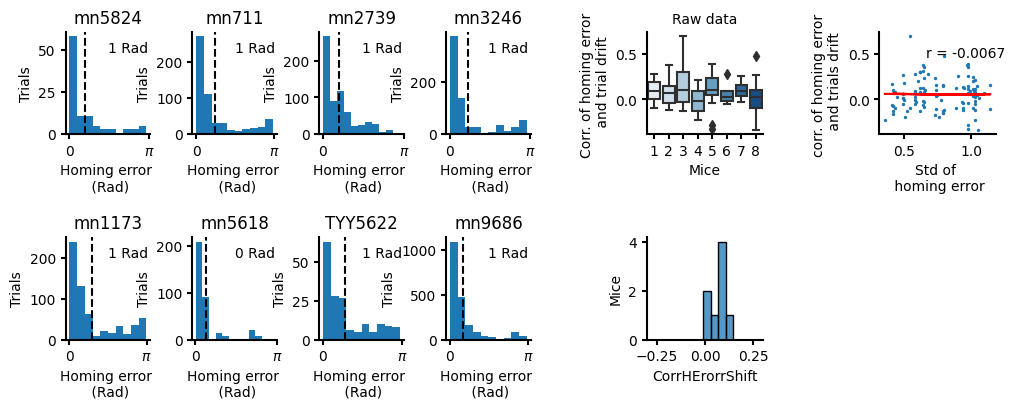

In [53]:
fig = plt.figure(figsize=(12,4))
sizePerRow, sizePerCol = 1.8, 1.2
nCells=5
col=4
row=2

#fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
gs = fig.add_gridspec(nrows=1, ncols=1,wspace=0.0,hspace=0.0) # one gridspec including all the figure

gs= gridspec.GridSpec(1, 3, figure=fig, width_ratios=[2,0.5,0.5], wspace=0.5)

gs_Homingerror = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=gs[0], wspace=0.5, hspace=1)

for i,m in enumerate(dfCells.subject.unique()):

    ax = fig.add_subplot(gs_Homingerror[i])
    plot_HomingErrorDistribution(ax,m)
    
gs_rawdata= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], wspace=0.4, hspace=1)

ax0= fig.add_subplot(gs_rawdata[0])
ax1= fig.add_subplot(gs_rawdata[1])
plot_RawData(ax0,ax1)

#gs_variance= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.4, hspace=1)
gs_std= gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.4, hspace=1)
ax2=fig.add_subplot(gs_std[0])
plot_Std(ax2)

#~fn = "/home/maryam/Desktop/Ca1_final/Sup12/sup12_revision_part2_v2.pdf"
fn = dataPath+"/results/Ca1_final__Sup12__sup12_revision_part2.pdf"
#print("saving",fn)
plt.savefig(fn, dpi=300)